<a href="https://colab.research.google.com/github/tevrat-aksoy/GlobalAIHubDLCourse/blob/main/Homeworks/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [19]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

### Import data

In [20]:
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


# Part 1: Analysis of Activation Functions


### Try other Activation Functions
Analyze the accuracy and training time
#### Example Syntax 
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='relu'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Sigmoid Activation Function

In [21]:
import time
t = time.time()

model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# do stuff
elapsed = time.time() - t
print("elapsed time: ", elapsed)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_49 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_50 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 1.3935 - accuracy: 0.6632 - val_loss: 0.3526 - val_accuracy: 0.9011
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3169 - accuracy: 0.9119 - val_loss: 0.2421 - val_accuracy: 0.9286
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2322 - accuracy: 0.

### Relu Activation Function

In [22]:
# Write your code here. Use the same architecture as above.
t = time.time()

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
elapsed = time.time() - t
print("elapsed time: ", elapsed)
 

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_52 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_53 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.6462 - accuracy: 0.8216 - val_loss: 0.2108 - val_accuracy: 0.9357
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1798 - accuracy: 0.9473 - val_loss: 0.1325 - val_accuracy: 0.9593
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1273 - accuracy: 0.

### Write your findings about activations here?

1.   Using "Relu" and "Sigmoid" activation functions increased test accuracy compared to others. Training is faster for  "Linear" and "Sigmoid" activation functions compared to others.
None of models have an overfitting problem.


Sigmoid  :Test loss: 0.10588689148426056   --   Test accuracy: 0.9659000039100647

Relu     : Test loss: 0.08892232179641724   --  Test accuracy: 0.9735000133514404

Tanh     : Test loss: 0.08468958735466003   --  Test accuracy: 0.9735999703407288




2.   "Linear" activation function reached 0.92 test accuracy and compared to other activation function this model seem to underfit the data




# Part 2: Design Choices: Nodes
#### Analyze the parameter size, accuracy and training time

### Design a model with small Number of Nodes. For Example 8

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_55 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_56 (Dense)             (None, 10)                330       
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 2.1146 - accuracy: 0.3731 - val_loss: 1.3697 - val_accuracy: 0.7417
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 1.1814 - accuracy: 0.7705 - val_loss: 0.7681 - val_accuracy: 0.8333
Test loss: 0.7680913805961609
Test accuracy: 0.833299994468689
Shape of First Layer (784, 8)
Visual

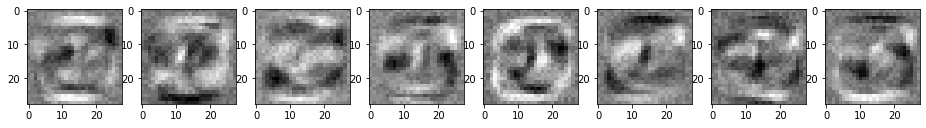

In [23]:
first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with large Number of Nodes. For example 128

In [24]:
# Write your code here 

# Use the same layer design from the above cell. Play with the parameter "first_layer_size" above. 
# It is preferred to have first_layer_size as multiplication of 8 (for visualizing the weights properly)

In [25]:
first_layer_size = 1024*8*2

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)



Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 16384)             12861440  
_________________________________________________________________
dense_58 (Dense)             (None, 32)                524320    
_________________________________________________________________
dense_59 (Dense)             (None, 10)                330       
Total params: 13,386,090
Trainable params: 13,386,090
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 3s 6ms/step - loss: 2.3472 - accuracy: 0.0992 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 2/2
469/469 [==============================] - 3s 6ms/step - loss: 2.3019 - accuracy: 0.1120 - val_loss: 2.3021 - val_accuracy: 0.1135
Test loss: 2.3021020889282227
Test accuracy: 0.11349999904632568
Shape of First Layer (78

<Figure size 1152x1152 with 0 Axes>

### Write your findings about influence of nodes here?

1.   first_layer_size = 128  => Model test accuracy increased to 0.935.Learnable parameter number also increased and model learned different features.
Model accuracy increased until first_layer_size equals 8192 and reached 0.952 

2.   After first_layer_size increased more than 8192 model accuracy decreased which indicates overfitting




# Part 3: Design Choices: Layers
#### Analyze the parameter size, accuracy and training time

### Design a model with small number of layers. For example 1 hidden layer

In [26]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_61 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7698 - accuracy: 0.7984 - val_loss: 0.2738 - val_accuracy: 0.9229
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2638 - accuracy: 0.9253 - val_loss: 0.2241 - val_accuracy: 0.9365
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2183 - accuracy: 0.9392 - val_loss: 0.1893 - val_accuracy: 0.9462
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1851 - ac

### Lower number of Layers. For example 4 hidden layers

In [27]:
# Write your code here 

# Use the same number of units from the above cell 

In [29]:
t = time.time()

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

elapsed = time.time() - t
print("elapsed time: ", elapsed)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_69 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_70 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_71 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_72 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.8546 - accuracy: 0.7390 - val_loss: 0.2

### Write your findings about influence of layers here?

1.   3 hidden layer model increased accuracy to 0.965 and trainig time also increased.
2.   4 hidden layer model accuracy decreased compared to 3 hidden layer and training time increased. This may have been due to overfitting. If the model depth is increased further test accuracy may decrease because of overfitting.